In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [262]:
%cd /content/drive/MyDrive/Summers 2021/Deep into CNNs/Project/W1-2

/content/drive/MyDrive/Summers 2021/Deep into CNNs/Project/W1-2


In [263]:
data = pd.read_csv('HappinessAlcoholConsumption.csv')

In [264]:
data

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [265]:
data['Alcohol'] = (data['Beer_PerCapita'] + data['Spirit_PerCapita'] + data['Wine_PerCapita'])/3

In [266]:
data

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,194.333333
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,188.333333
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,124.000000
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,123.000000
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,164.333333
...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1,14.333333
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2,57.666667
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13,17.000000
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19,19.000000


In [267]:
new_data = data[['Country','Alcohol','HappinessScore']]
data = new_data

In [268]:
# data/
A = data[['Alcohol', 'HappinessScore']]

In [269]:
matrix = np.array(A.values,'float')

In [293]:
# matrix[0:100,:]

In [271]:

X = matrix[:,0]
y = matrix[:,1]

In [272]:
X = X/(np.max(X))

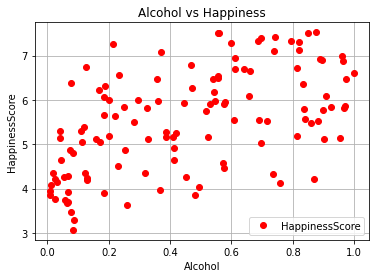

In [273]:
plt.plot(X,y,'ro')
plt.ylabel('HappinessScore')
plt.xlabel('Alcohol')
plt.legend(['HappinessScore'])
plt.title('Alcohol vs Happiness')
plt.grid()
plt.show()

In [274]:
def computecost(x,y,theta):
  cost = 1/(2*m)*np.sum(((x@theta)-y)**2)
  return cost

In [275]:
m = np.size(y)
X = X.reshape([122,1])
x = np.hstack([np.ones_like(X),X])

theta = np.zeros([2,1])

In [276]:
# x
print(computecost(x,y,theta))

1941.7825705000002


In [277]:
def gradient(x,y,theta):
  alpha = 1e-5
  iteration = 2000
  
  cost_history = np.zeros([iteration,1])

  for iter in range(0,2000):
    error = (x@theta) - y
    temp0 = theta[0] - ((alpha/m)*np.sum(error*x[:,0]))
    temp1 = theta[1] - ((alpha/m)*np.sum(error*x[:,1]))
    theta = np.array([temp0, temp1]).reshape(2,1)
    cost_history[iter] = (1/(2*m))*(np.sum(((x@theta)-y)**2))
  return theta, cost_history

In [278]:
theta, cost = gradient(x,y,theta)
print(theta)

[[4.22499706]
 [2.38031097]]


In [279]:
print(cost)

[[1936.24274283]
 [1930.71941566]
 [1925.21254022]
 ...
 [ 115.49668262]
 [ 115.49460323]
 [ 115.49255932]]


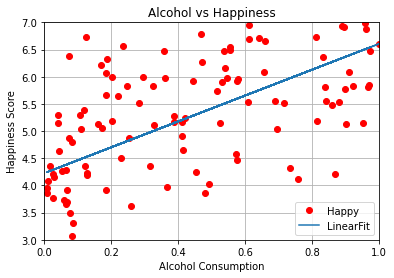

In [282]:
plt.plot(X,y,'ro')
plt.plot(X,x@theta,'-')
plt.axis([0,1,3,7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol Consumption')
plt.legend(['Happy','LinearFit'])
plt.title('Alcohol vs Happiness')
plt.grid()
plt.show()

In [290]:
predict1 = [0.2,(164/np.max(matrix[:,0]))] @ theta
print(predict1)

[2.60607159]
